# A Radical Approach to Real Analysis: Section 1.2

    Ben Simmons
    Self Study
    10/16/2017

In [1]:
import numpy as np
import sympy as sy
from matplotlib import rcParams, pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

rcParams['figure.figsize'] = (10,10)
rcParams['legend.fontsize'] = 20

## 1.2.1

Graph each of the following partial sums of Fourier's expansion over the interval $-1 \leq x \leq 3$.

a. $\frac{4}{\pi} \cos(\pi x/2)$

b. $\frac{4}{\pi} \left[\cos(\pi x/2) - \frac{1}{3} \cos(3 \pi x/2)\right]$

c. $\frac{4}{\pi} \left[\cos(\pi x/2) - \frac{1}{3} \cos(3 \pi x/2) + \frac{1}{5} \cos(5 \pi x/2)\right]$

d. $\frac{4}{\pi} \left[\cos(\pi x/2) - \frac{1}{3} \cos(3 \pi x/2) + \frac{1}{5} \cos(5 \pi x/2) - \frac{1}{7} \cos(7 \pi x/2)\right]$

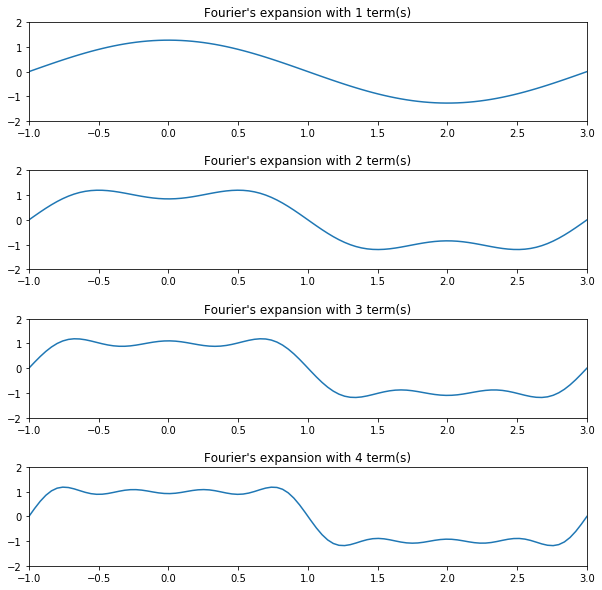

In [2]:
t1 = lambda x: np.cos(np.pi * x/2)
t2 = lambda x: np.cos(np.pi * 3*x/2)/3
t3 = lambda x: np.cos(np.pi * 5*x/2)/5
t4 = lambda x: np.cos(np.pi * 7*x/2)/7

f_list = []
f_list.append(lambda x: 4/np.pi * t1(x))
f_list.append(lambda x: 4/np.pi * (t1(x) - t2(x)))
f_list.append(lambda x: 4/np.pi * (t1(x) - t2(x) + t3(x)))
f_list.append(lambda x: 4/np.pi * (t1(x) - t2(x) + t3(x) - t4(x)))

x = np.linspace(-1, 3, 100)
for i in range(1, 5):
    plt.subplot(4, 1, i, label=str(i))
    plt.axis([-1, 3, -2, 2])
    plt.title("Fourier's expansion with {} term(s)".format(i))
    plt.plot(x, f_list[i-1](x))

plt.subplots_adjust(hspace=.5)
plt.show()

## 1.2.2

Let $F_n(x)$ denote the sum of the first $n$ terms of Fourier's series evaluated at $x$:

$F_n(x) = \frac{4}{x} \left[\cos{\frac{\pi x}{2}} - \frac{1}{3}\cos{\frac{3 \pi x}{2}} + ... + \frac{(-1)^{n-1}}{2n - 1}\cos{\frac{(2n - 1) \pi x}{2}}\right]$

a. Evaluate $F_{100}(x)$ at $x = 0, 0.5, 0.9, 0.99, 1.1,$ and $2$. Is this close to the expected value?

b. Evaluate $F_n(0.99)$ at $n = 100, 200, 300, ..., 2000$ and plot these successive approximations.

c. Evaluate $F_n(0.999)$ at $n = 100, 200, 300, ..., 2000$ and plot these successive approximations.

d. What is the value of this infinite series at $x = 1$?

In [3]:
x, n, N = sy.symbols('x n N')
term = (-1)**(n-1)/(2*n-1) * sy.cos((2*n-1)*sy.pi*x/2)
fn = 4/sy.pi * sy.summation(term, (n, 1, N))
f = sy.lambdify((x, N), fn, 'numpy')

In [4]:
x = np.array([0, 0.5, 0.9, 0.99, 1.1, 2])
f(x, 100)

array([ 0.99681698,  0.99549876,  0.97969277,  1.17898808, -0.97969277,
       -0.99681698])

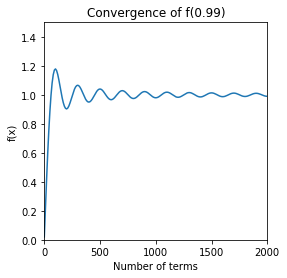

In [5]:
n_list = range(1, 2002, 10)
y_list = [f(0.99, n) for n in n_list]
plt.figure(figsize=(4,4))
plt.plot(n_list, y_list)
plt.axis([0, 2001, 0, 1.5])
plt.title("Convergence of f(0.99)")
plt.xlabel("Number of terms")
plt.ylabel("f(x)")
plt.show()

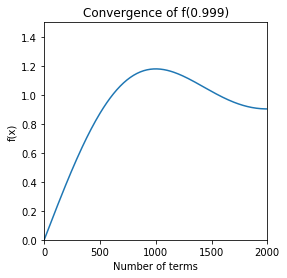

In [6]:
n_list = range(1, 2002, 10)
y_list = [f(0.999, n) for n in n_list]
plt.figure(figsize=(4,4))
plt.plot(n_list, y_list)
plt.axis([0, 2001, 0, 1.5])
plt.title("Convergence of f(0.999)")
plt.xlabel("Number of terms")
plt.ylabel("f(x)")
plt.show()

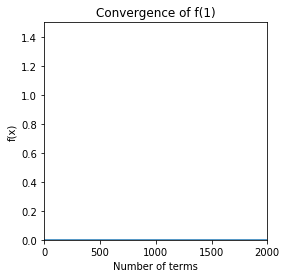

In [7]:
# f(1) = 0
# For x = 1, every term will be cos(k*pi/2), which is always 0, so the series will sum to 0.

n_list = range(1, 2002, 10)
y_list = [f(1, n) for n in n_list]
plt.figure(figsize=(4,4))
plt.plot(n_list, y_list)
plt.axis([0, 2001, 0, 1.5])
plt.title("Convergence of f(1)")
plt.xlabel("Number of terms")
plt.ylabel("f(x)")
plt.show()

## 1.2.3

Evaluate the partial sums of the series

$1 + \frac{1}{3} + \frac{1}{5} + \frac{1}{7} + \frac{1}{9} + ...$

for the first 10, 20, 40, 80, 160, 320, and 640 terms. Does this series appear to approach a value? If so, what value is it approaching?

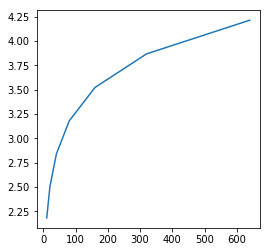

In [8]:
# Looks like it *could* approach a value. But I already know it's a divergent series.

n, N = sy.symbols('n N')
fn = sy.summation(1/(2*n+1), (n, 0, N))
f = sy.lambdify(N, fn, 'numpy')

# Note: it appears that sympy doesn't vectorize sums along the index arguments (e.g. N)
x = [10, 20, 40, 80, 160, 320, 640]
y = [f(n) for n in x]

plt.figure(figsize=(4,4))
plt.plot(x, y)
plt.show()

## 1.2.4

Graph the surfaces described by the partial sums consisting of the first term, the first two terms, the first three terms, and the first four terms of Fourier's solution over $0 \leq w \leq 0.6, -1 \leq x \leq 1$:

$z(x,w) = \frac{4}{\pi} \left[ e^{-\pi w/2}\cos{\frac{\pi x}{2}} - \frac{1}{3}e^{-3 \pi w/2}\cos{\frac{3 \pi x}{2}} + \frac{1}{5}e^{-5 \pi w/2}\cos{\frac{5 \pi x}{2}} - \frac{1}{7}e^{-7 \pi w/2}\cos{\frac{7 \pi x}{2}} + \dots \right]$

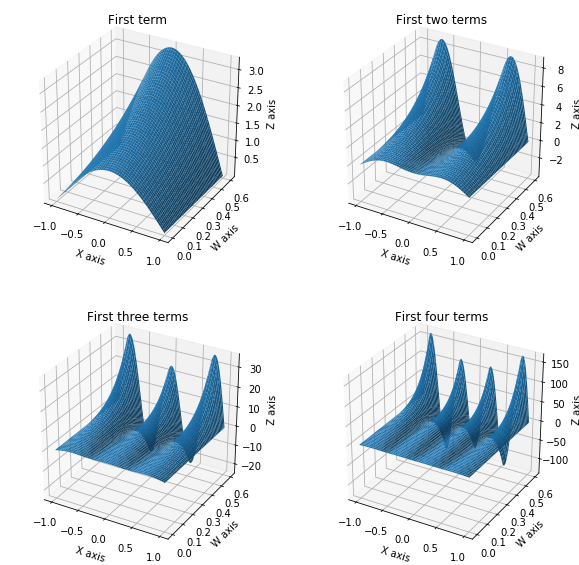

In [9]:
x, w, n, N = sy.symbols('x w n N')
term = (-1)**(n-1)/(2*n-1) * sy.exp((2*n-1)*sy.pi*w/2) * sy.cos((2*n-1)*sy.pi*x/2)
zn = 4/sy.pi * sy.summation(term, (n, 1, N))
z = sy.lambdify((x, w, N), zn, 'numpy')

x = np.linspace(-1, 1, 200)
w = np.linspace(0, 0.6, 200)
X, W = np.meshgrid(x, w)

fig = plt.figure()
labels = ["First term", "First two terms", "First three terms", "First four terms"]
for i in range(1, 5):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    Z = z(X, W, i)
    ax.plot_surface(X, W, Z)
    ax.set_title(labels[i-1])
    ax.set_xlabel('X axis')
    ax.set_ylabel('W axis')
    ax.set_zlabel('Z axis')
  
plt.show()

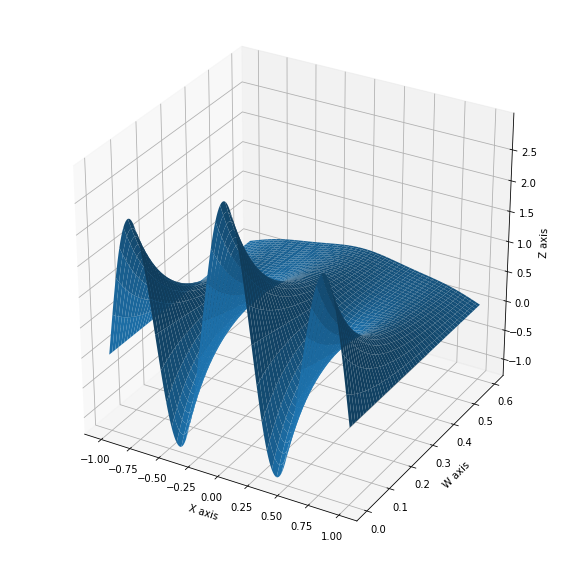

In [10]:
# Compare to the Fourier series (1.6)
# Equation (1.6) drops off exponentially to zero as we move away from the x-axis.
# Whereas the new series increases exponentially as we move away from the x-axis.
x, w = sy.symbols('x w')
zn = sy.exp(-sy.pi*w/2) * sy.cos(sy.pi*x/2) + 2*sy.exp(-5*sy.pi*w/2) * sy.cos(5*sy.pi*x/2)
z = sy.lambdify((x, w), zn, 'numpy')

x = np.linspace(-1, 1, 200)
w = np.linspace(0, 0.6, 200)
X, W = np.meshgrid(x, w)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z = z(X, W)
ax.plot_surface(X, W, Z)
ax.set_xlabel("X axis")
ax.set_ylabel("W axis")
ax.set_zlabel("Z axis")

plt.show()

## 1.2.6

Fourier series illustrate the dangers of trying to find limits by simply substituting the value that x approaches. Consider Fourier's series.

a. What value does this approach as x approaches 1 from the left?

b. What value does this approach as x approaches 1 from the right?

c. What is the value of $f(1)$?

In [11]:
x, n, N = sy.symbols('x n N')
term = (-1)**(n-1)/(2*n-1) * sy.cos((2*n-1)*sy.pi*x/2)
fn = 4/sy.pi * sy.summation(term, (n, 1, N))
f = sy.lambdify((x, N), fn)

left_limit = f(0.99999, 10000)
right_limit = f(1.00001, 10000)
value = f(1.0, 10000)

print("Left limit ~= {}, Right limit ~= {}, f(1) ~= {}".format(left_limit, right_limit, value))

Left limit ~= 0.19890661881681065, Right limit ~= -0.1989066188174601, f(1) ~= 7.800630171142661e-13


## 1.2.7

Consider the function that we get if we differentiate each summand of the function $f(x)$ defined in equation (1.12):

$g(x) = -2 \left( \sin{\frac{\pi x}{2}} - \sin{\frac{3 \pi x}{2}} + \sin{\frac{5 \pi x}{2}} - \sin{\frac{7 \pi x}{2}} + \dots \right)$

a. For $-1 < x < 3$, graph the partial sums of this series consisting of the first 10, 20, 30, 40, and 50 terms. Does it appear that these graphs are approaching the constant function 0?

b. Evaluate the partial sums up to at least 20 terms when $x = 0, 0.2, 0.3,$ and $0.5$. Does it appear that this series is approaching 0 at each of these values of x?

c. What *is* happening at $x = 0, 0.2, 0.3, 0.5$? What can you prove?

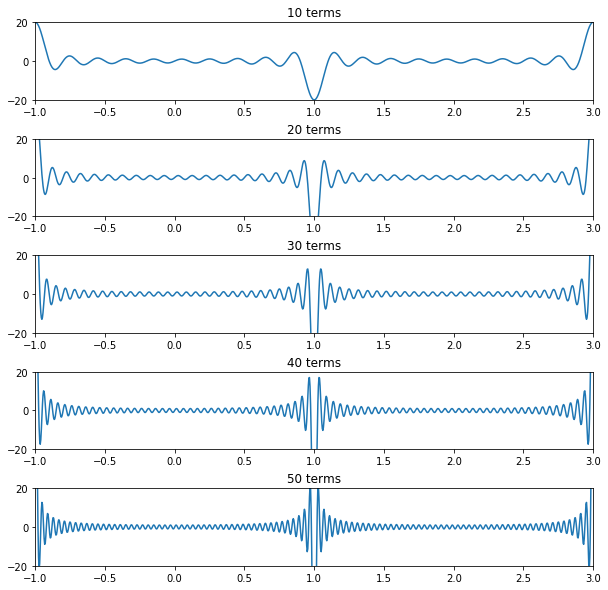

In [12]:
# If you zoom in it becomes apparently that these series do not approach 0.
# They maintain an amplitude difference of 2 around the middle sections, it just gets more filled in
# as the number of terms increases. This amplitude difference seems to be governed by the leading constant,
# which is -2 in this case.
# Also they diverge more extremely around x = -1, 1, and 3 as the number of terms increases.

x, n, N = sy.symbols('x n N')
term = (-1)**(n-1) * sy.sin((2*n-1)*sy.pi*x/2)
fn = -2 * sy.summation(term, (n, 1, N))
f = sy.lambdify((x, N), fn)

n_list = [10, 20, 30, 40, 50]

for i, n in enumerate(n_list):
    x = np.linspace(-1, 3, 1000)
    plt.subplot(len(n_list), 1, i+1)
    plt.title("{} terms".format(n))
    plt.axis([-1, 3, -20, 20])
    plt.plot(x, f(x, n))

plt.subplots_adjust(hspace=.5)
plt.show()

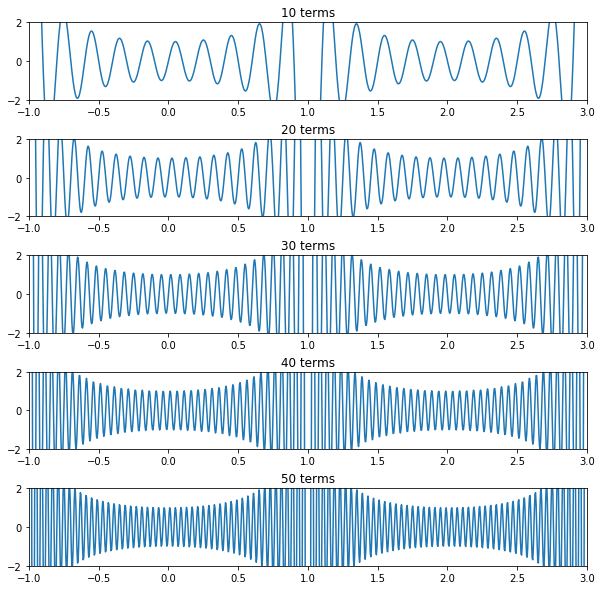

In [13]:
# Zoom in
for i, n in enumerate(n_list):
    x = np.linspace(-1, 3, 1000)
    plt.subplot(len(n_list), 1, i+1)
    plt.title("{} terms".format(n))
    plt.axis([-1, 3, -2, 2])
    plt.plot(x, f(x, n))

plt.subplots_adjust(hspace=.5)
plt.show()

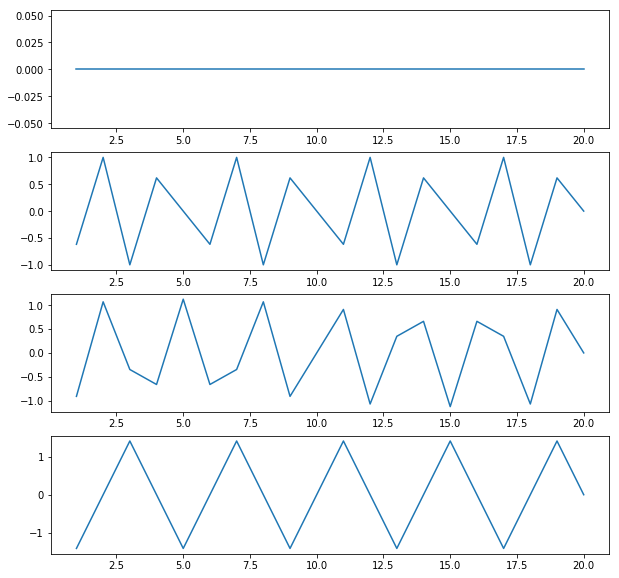

In [14]:
# x = 0 is an actual intersection point.
# x = 0.2, 0.3, and 0.5 are near intersection points.
# There appears to be no convergence for x = 0.2, 0.3, or 0.5 as the number of terms increases.

x, n, N = sy.symbols('x n N')
term = (-1)**(n-1) * sy.sin((2*n-1)*sy.pi*x/2)
fn = -2 * sy.summation(term, (n, 1, N))
f = sy.lambdify((x, N), fn)

x_list = [0, 0.2, 0.3, 0.5]
for i, x in enumerate(x_list):
    n_list = range(1, 21)
    y_list = [f(x, n) for n in n_list]
    plt.subplot(len(x_list), 1, i+1, label=str(i))
    plt.plot(n_list, y_list)
    
plt.show()